# This is my honors research project on the Influence of extreme climatic conditions on insurance companies stock prices

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [9]:
insurance_df = pd.read_csv('data/insurance.csv')
tornado_df1= pd.read_csv('data/us_tornado_dataset_1950_2021.csv')
tornado_df2 = pd.read_csv('data/tornados.csv')

In [10]:
print("Tornado Dataset 1")
print(tornado_df1.head())

Tornado Dataset 1
     yr  mo  dy        date  st  mag  inj  fat   slat   slon   elat   elon  \
0  1950   1   3  1950-01-03  IL    3    3    0  39.10 -89.30  39.12 -89.23   
1  1950   1   3  1950-01-03  MO    3    3    0  38.77 -90.22  38.83 -90.03   
2  1950   1   3  1950-01-03  OH    1    1    0  40.88 -84.58   0.00   0.00   
3  1950   1  13  1950-01-13  AR    3    1    1  34.40 -94.37   0.00   0.00   
4  1950   1  25  1950-01-25  IL    2    0    0  41.17 -87.33   0.00   0.00   

   len  wid  
0  3.6  130  
1  9.5  150  
2  0.1   10  
3  0.6   17  
4  0.1  100  


In [11]:
print("\nTornado Dataset 2")
print(tornado_df2.head())


Tornado Dataset 2
    om    yr  mo  dy        date      time               tz  \
0  192  1950  10   1  1950-10-01  21:00:00  America/Chicago   
1  193  1950  10   9  1950-10-09  02:15:00  America/Chicago   
2  195  1950  11  20  1950-11-20  02:20:00  America/Chicago   
3  196  1950  11  20  1950-11-20  04:00:00  America/Chicago   
4  197  1950  11  20  1950-11-20  07:30:00  America/Chicago   

           datetime_utc  st  stf  ...   elon   len  wid  ns  sn   f1  f2  f3  \
0  1950-10-02T03:00:00Z  OK   40  ... -102.3  15.8   10   1   1   25   0   0   
1  1950-10-09T08:15:00Z  NC   37  ...    0.0   2.0  880   1   1   47   0   0   
2  1950-11-20T08:20:00Z  KY   21  ...    0.0   0.1   10   1   1  177   0   0   
3  1950-11-20T10:00:00Z  KY   21  ...    0.0   0.1   10   1   1  209   0   0   
4  1950-11-20T13:30:00Z  MS   28  ...    0.0   2.0   37   1   1  101   0   0   

   f4     fc  
0   0  False  
1   0  False  
2   0  False  
3   0  False  
4   0  False  

[5 rows x 27 columns]


In [12]:
print("\nInsurance ETF Dataset")
print(insurance_df.head())


Insurance ETF Dataset
   Unnamed: 0 Ticker        Date       Open       High        Low  Close  \
0           0    IAK  2006-05-05  50.099998  50.250000  50.099998  50.25   
1           1    IAK  2006-05-06  50.099998  50.250000  50.099998  50.25   
2           2    IAK  2006-05-07  50.099998  50.250000  50.099998  50.25   
3           3    IAK  2006-05-08  50.299999  50.349998  50.230000  50.23   
4           4    IAK  2006-05-09  50.209999  50.310001  50.200001  50.25   

   Adj Close  Volume company_name  
0  36.464928     600          IAK  
1  36.464928     600          IAK  
2  36.464928     600          IAK  
3  36.450413    1800          IAK  
4  36.464928     800          IAK  


In [13]:
print(tornado_df1.columns)

Index(['yr', 'mo', 'dy', 'date', 'st', 'mag', 'inj', 'fat', 'slat', 'slon',
       'elat', 'elon', 'len', 'wid'],
      dtype='object')


In [14]:
insurance_df['Date'] = pd.to_datetime(insurance_df['Date'])
tornado_df1['date'] = pd.to_datetime(tornado_df1['date'], errors='coerce')
tornado_df2['date'] = pd.to_datetime(tornado_df2['date'], errors='coerce')

In [15]:
insurance_df = insurance_df.sort_values(by='Date')
tornado_df1 = tornado_df1.sort_values(by='date')
tornado_df2 = tornado_df2.sort_values(by='date')

Visualize the number of tornadoes over time (using Tornado Dataset 1)

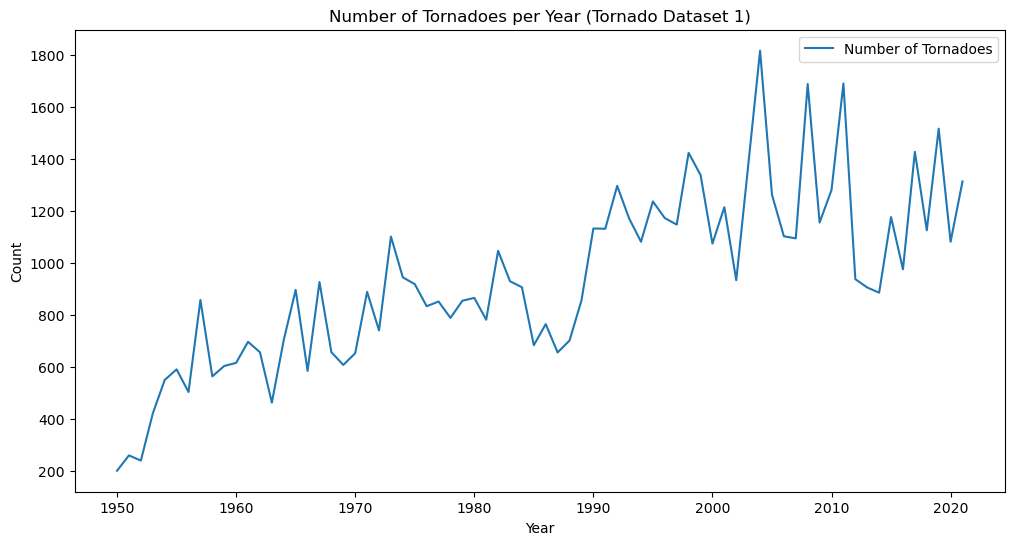

In [16]:
tornado_count = tornado_df1.groupby('yr').size()
plt.figure(figsize=(12, 6))
plt.plot(tornado_count.index, tornado_count.values, label='Number of Tornadoes')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Tornadoes per Year (Tornado Dataset 1)')
plt.legend()
plt.show()

Visualize the IAK ETF closing prices over time



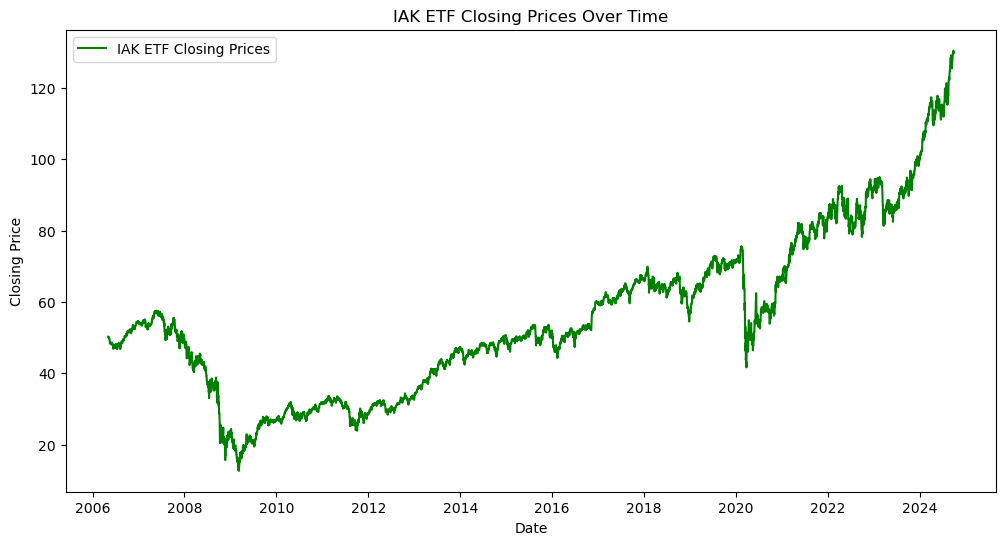

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(insurance_df['Date'], insurance_df['Close'], label='IAK ETF Closing Prices', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('IAK ETF Closing Prices Over Time')
plt.legend()
plt.show()

Calculate monthly averages for tornado occurrences and IAK ETF closing prices


In [18]:
insurance_df['YearMonth'] = insurance_df['Date'].dt.to_period('M')
tornado_df1['YearMonth'] = tornado_df1['date'].dt.to_period('M')
monthly_tornadoes = tornado_df1.groupby('YearMonth').size()
monthly_iak = insurance_df.groupby('YearMonth')['Close'].mean()

In [19]:
monthly_data = pd.DataFrame({'Tornadoes': monthly_tornadoes, 'IAK_Close': monthly_iak})
monthly_data = monthly_data.dropna()

Correlation between tornado occurrences and IAK ETF prices


In [20]:
correlation = monthly_data.corr().loc['Tornadoes', 'IAK_Close']
print(f"Correlation between Tornadoes and IAK ETF Closing Prices: {correlation:.2f}")

Correlation between Tornadoes and IAK ETF Closing Prices: 0.02


0.02 is considered positive yet weak correlation. That indicates, there is very weak positive relationship between the tornado occurances and the closing prices of the IAK ETF (Insurance ETF)

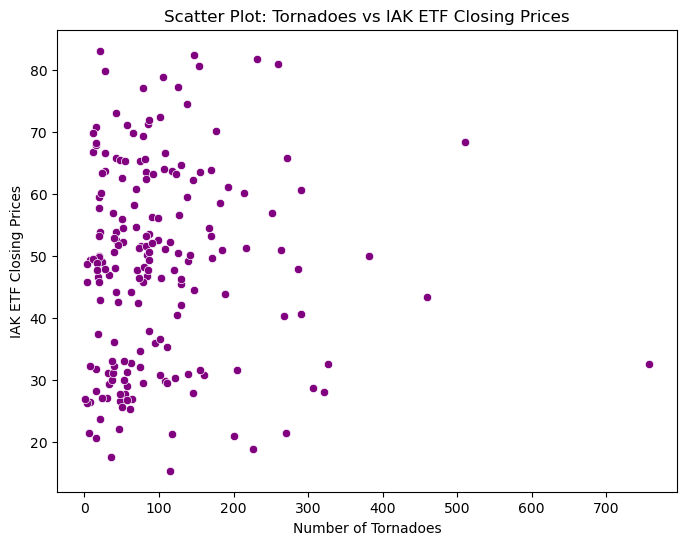

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=monthly_data['Tornadoes'], y=monthly_data['IAK_Close'], color='purple')
plt.xlabel('Number of Tornadoes')
plt.ylabel('IAK ETF Closing Prices')
plt.title('Scatter Plot: Tornadoes vs IAK ETF Closing Prices')
plt.show()